# Description: This program predicts the price of FB stock for a specific day
## Support Vector Regression (SVR) Model

In [10]:
#import the packages
from sklearn.svm import SVR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [11]:
#Load the data
# This is data from Yahoo for the past 30 days, 5–1–2019 to 5–31–2019.
df = pd.read_csv('FB.csv')
df

,Date,Open Price,High Price,Low Price,Close Price,Adj Close Price,Volume
0,5/1/2019,194.779999,196.179993,193.009995,193.029999,193.029999,15996600
1,5/2/2019,193.000000,194.000000,189.750000,192.529999,192.529999,13209500
2,5/3/2019,194.380005,196.160004,193.710007,195.470001,195.470001,14575400
3,5/6/2019,191.240005,194.279999,190.550003,193.880005,193.880005,13994900
4,5/7/2019,192.539993,192.899994,187.850006,189.770004,189.770004,16253000
5,5/8/2019,189.389999,190.720001,188.550003,189.539993,189.539993,12505700
6,5/9/2019,187.199997,189.770004,186.259995,188.649994,188.649994,12967000
7,5/10/2019,188.250000,190.000000,184.589996,188.339996,188.339996,12578500
8,5/13/2019,183.500000,185.429993,180.839996,181.539993,181.539993,16833300
9,5/14/2019,182.520004,183.490005,178.100006,180.729996,180.729996,17628100


In [12]:
#Get the number of rows and columns in the data set 
df.shape

(21, 7)

In [13]:
#Print the last row of data (this will be the data that we test on)
actual_price = df.tail(1)
actual_price

,Date,Open Price,High Price,Low Price,Close Price,Adj Close Price,Volume
20,5/30/2019,183.080002,183.479996,180.889999,183.009995,183.009995,8581500


In [14]:
#Get all of the data except for the last row
df = df.head(len(df)-1)
print(df.shape)
df

(20, 7)


,Date,Open Price,High Price,Low Price,Close Price,Adj Close Price,Volume
0,5/1/2019,194.779999,196.179993,193.009995,193.029999,193.029999,15996600
1,5/2/2019,193.000000,194.000000,189.750000,192.529999,192.529999,13209500
2,5/3/2019,194.380005,196.160004,193.710007,195.470001,195.470001,14575400
3,5/6/2019,191.240005,194.279999,190.550003,193.880005,193.880005,13994900
4,5/7/2019,192.539993,192.899994,187.850006,189.770004,189.770004,16253000
5,5/8/2019,189.389999,190.720001,188.550003,189.539993,189.539993,12505700
6,5/9/2019,187.199997,189.770004,186.259995,188.649994,188.649994,12967000
7,5/10/2019,188.250000,190.000000,184.589996,188.339996,188.339996,12578500
8,5/13/2019,183.500000,185.429993,180.839996,181.539993,181.539993,16833300
9,5/14/2019,182.520004,183.490005,178.100006,180.729996,180.729996,17628100


In [15]:
#Create the lists / X and y data set
days = list()
adj_close_prices = list()

In [16]:
df_days = df.loc[:,'Date']
df_adj_close = df.loc[:,'Adj Close Price']

In [17]:
#Create the independent data set 'X' as days
for day in df_days:
   days.append( [int(day.split('/')[1]) ] )

#Create the dependent data set 'y' as prices
for adj_close_price in df_adj_close:
   adj_close_prices.append(float(adj_close_price))

In [18]:
print(days)

[[1], [2], [3], [6], [7], [8], [9], [10], [13], [14], [15], [16], [17], [20], [21], [22], [23], [24], [28], [29]]


In [19]:
#Create and train an SVR model using a linear kernel
lin_svr = SVR(kernel='linear', C=1000.0)
lin_svr.fit(days,adj_close_prices)

#Create and train an SVR model using a polynomial kernel
poly_svr = SVR(kernel='poly', C=1000.0, degree=2)
poly_svr.fit(days, adj_close_prices)

#Create and train an SVR model using a RBF kernel
rbf_svr = SVR(kernel='rbf', C=1000.0, gamma=0.15)
rbf_svr.fit(days, adj_close_prices)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.15,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

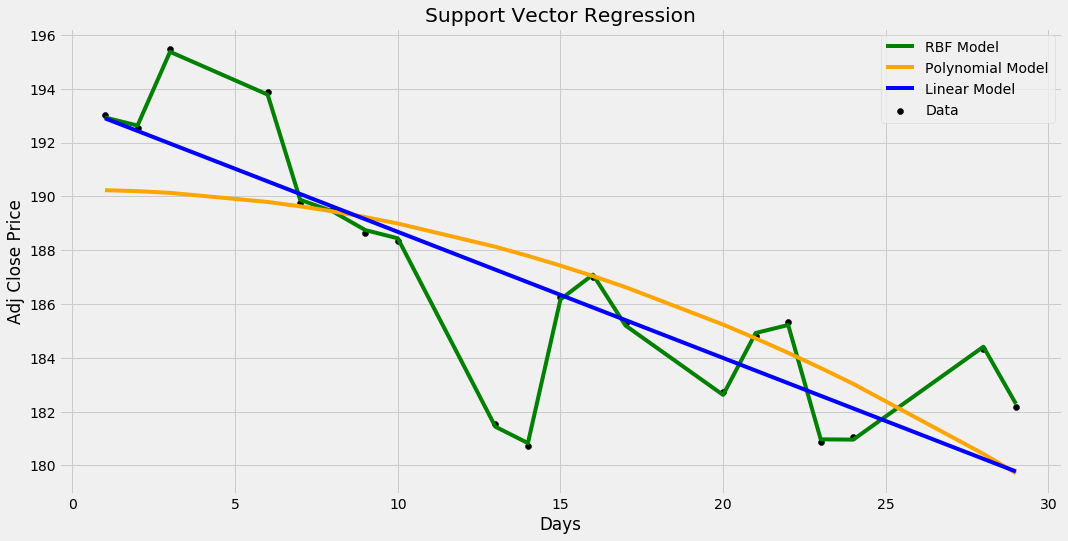

In [20]:
#Plot the models on a graph to see which has the best fit
plt.figure(figsize=(16,8))
plt.scatter(days, adj_close_prices, color = 'black', label='Data')
plt.plot(days, rbf_svr.predict(days), color = 'green', label='RBF Model')
plt.plot(days, poly_svr.predict(days), color = 'orange', label='Polynomial Model')
plt.plot(days, lin_svr.predict(days), color = 'blue', label='Linear Model')
plt.xlabel('Days')
plt.ylabel('Adj Close Price')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

In [21]:
day = [[30]]
print('The RBF SVR predicted price:',rbf_svr.predict(day))
print('The linear SVR predicted price',lin_svr.predict(day))
print('The polynomial SVR predicted price',poly_svr.predict(day))

The RBF SVR predicted price: [183.1849333]
The linear SVR predicted price [179.3073398]
The polynomial SVR predicted price [178.97701138]


In [22]:
'''
The RBF model predicted the price for day 30to be $183.1849333
which is pretty close to the actual price of $183.009995.
In this case the best model seems to be the polynomial SVR.
'''

'\nThe RBF model predicted the price for day 30to be $183.1849333\nwhich is pretty close to the actual price of $183.009995.\nIn this case the best model seems to be the polynomial SVR.\n'